# American Sign Language

### About Dataset

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
#Loading traning data into dataframe
df_traindata =pd.read_csv("sign_mnist_train.csv")

In [26]:
#Loading testing data into dataframe
df_testdata =pd.read_csv("sign_mnist_test.csv")

# 2. Familiarizing with Data

In this step, few dataframe methods are used to look into the data and its features.



In [27]:
#checking first 5 instances of dataframe

df_traindata .head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [28]:
#Shape of dataframe
df_traindata.shape

(27455, 785)

In [29]:
#checking the data for null or missing values
df_traindata.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [30]:
# checking info of dataframe

df_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [31]:
# checking unique value in dataset

labels =df_traindata['label'].values

unique_values = np.array(labels)
np.unique(unique_values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [32]:
# describtion of dataset

df_traindata.describe().T

,count,mean,std,min,25%,50%,75%,max
label,27455.0,12.318813,7.287552,0.0,6.0,13.0,19.0,24.0
pixel1,27455.0,145.419377,41.358555,0.0,121.0,150.0,174.0,255.0
pixel2,27455.0,148.500273,39.942152,0.0,126.0,153.0,176.0,255.0
pixel3,27455.0,151.247714,39.056286,0.0,130.0,156.0,178.0,255.0
pixel4,27455.0,153.546531,38.595247,0.0,133.0,158.0,179.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,27455.0,162.736696,63.444008,0.0,125.0,184.0,207.0,255.0
pixel781,27455.0,162.906137,63.509210,0.0,128.0,184.0,207.0,255.0
pixel782,27455.0,161.966454,63.298721,0.0,128.0,182.0,206.0,255.0
pixel783,27455.0,161.137898,63.610415,0.0,128.0,182.0,204.0,255.0


<AxesSubplot:ylabel='count'>

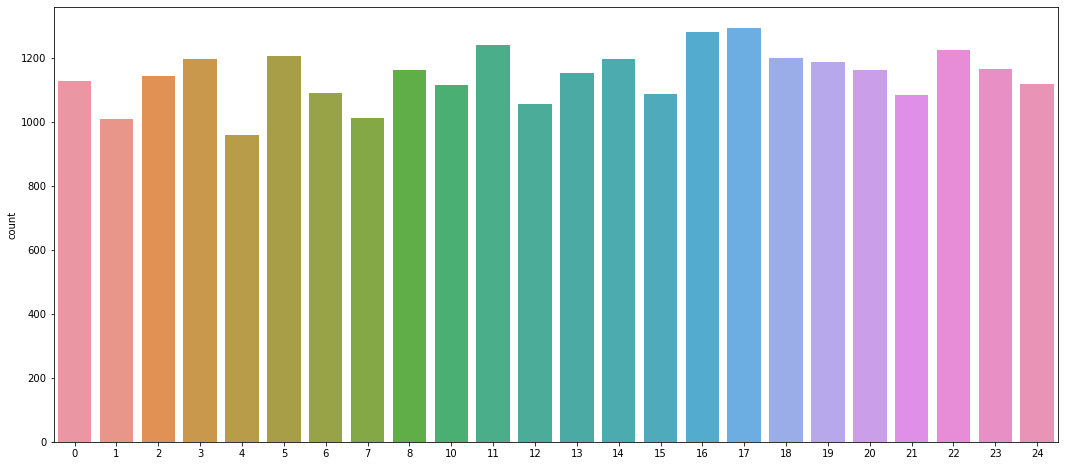

In [33]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [34]:
train_label=df_traindata['label']         # contains set of all label values in order
train_label.head()


0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [35]:
 #contains set of all pixel values in order
train=df_traindata.drop(['label'],axis=1)
train.head()  

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [36]:
x_train = train.values.reshape(-1,28,28,1)
print(x_train.shape)

(27455, 28, 28, 1)


Now, we must perform the same data preprocessing steps for the test dataset

In [37]:
test_label=df_testdata['label']
x_test=df_testdata.drop(['label'],axis=1)

print(x_test.shape)
x_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [38]:
x_test=x_test.values.reshape(-1,28,28,1)

# Normaliziation

In [39]:
x_train = x_train / 255        
x_test = x_test / 255

Converting the integer labels (0-24) to binary format
The label dataframe consist of single values from 1 to 24 for each individual picture. The CNN output layer will be of 24 nodes since it has 24 different labels as a multi label classifier. Hence each integer is encoded in a binary array of size 24 with the corresponding label being 1 and all other labels are 0. Such as if y=4 the the array is [0 0 0 1 0 0.....0]. The LabelBinarizer package from sklearn.preprocessing is used for that.

In [40]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()

y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [41]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


 Preview of first 10 Training Images after Normalization and Reshaping¶

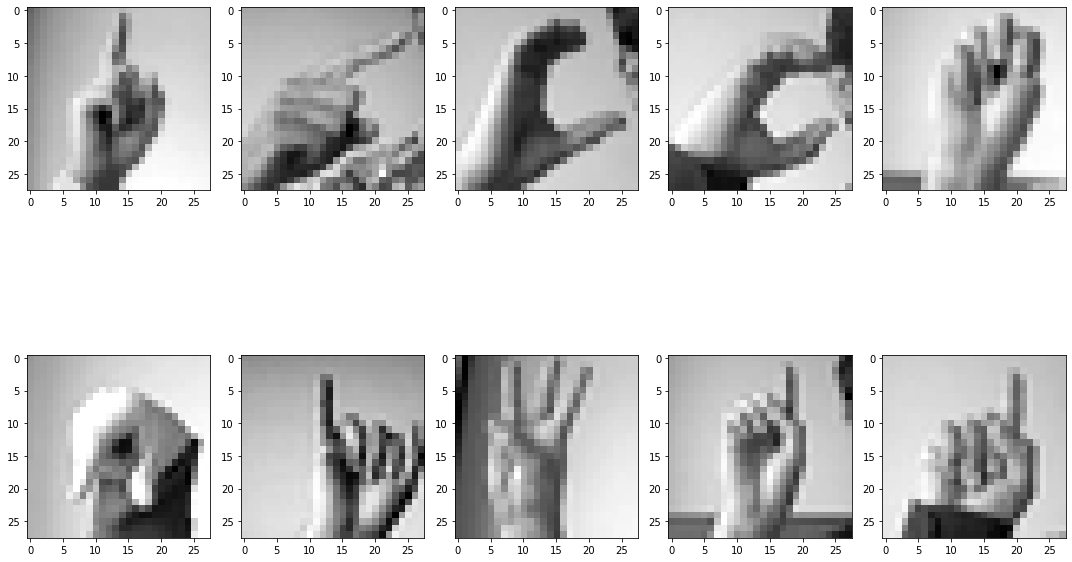

In [43]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(15, 15)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout() 

Preview of first 10 Testing Images after Normalization and Reshaping

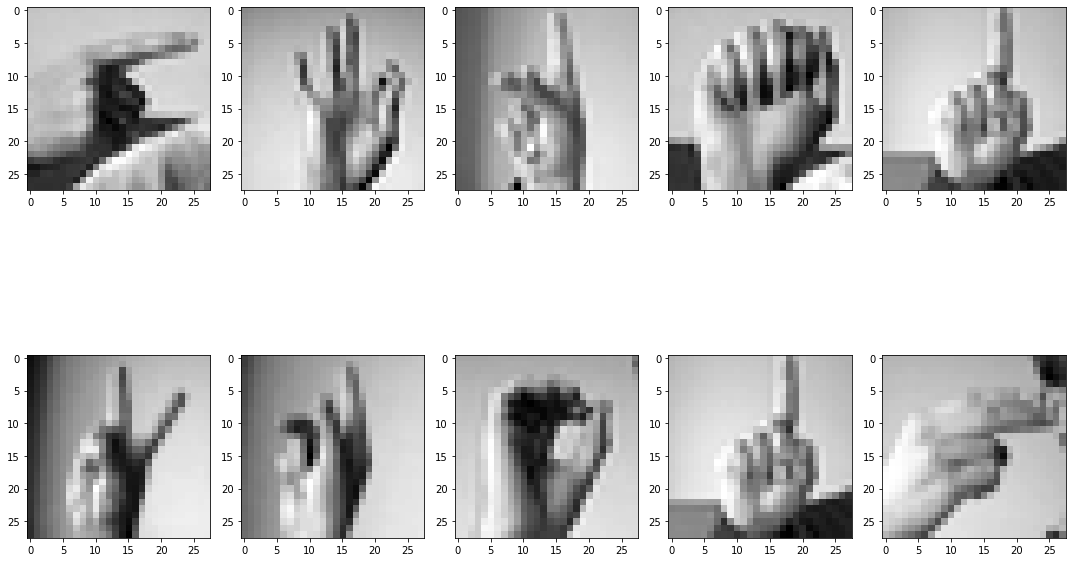

In [45]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(15, 15)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_test[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout() 

# CNN

In [56]:
datagen = ImageDataGenerator(
        featurewise_center=False,                 # set input mean to 0 over the dataset
        samplewise_center=False,                  # set each sample mean to 0
        featurewise_std_normalization=False,      # divide inputs by std of the dataset
        samplewise_std_normalization=False,       # divide each input by its std
        zca_whitening=False,                      # apply ZCA whitening
        rotation_range=10,                        # randomly rotate images in the range (degrees, 0 to 180) - 1
        zoom_range = 0.1,                         # Randomly zoom image - 2
        width_shift_range=0.1,                    # randomly shift images horizontally (fraction of total width) - 3
        height_shift_range=0.1,                   # randomly shift images vertically (fraction of total height) - 4
        horizontal_flip=False,                    # randomly flip images -5
        vertical_flip=False)                      # randomly flip images - 6


datagen.fit(x_train)

In [57]:
# Reducing learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [58]:
# Model Creation

model = Sequential()

# convolution layer

# block 1
model.add(Conv2D(filters=32, kernel_size=(3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

# block 2
model.add(Conv2D(filters=128, kernel_size=(3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

# block 3
model.add(Conv2D(filters=256, kernel_size=(3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

# fully connected layer

# flatten layer
model.add(Flatten())
# dense layer 
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dense(units = 256 , activation = 'relu'))
model.add(Dropout(0.5))
# final layer
model.add(Dense(units = 24 , activation = 'softmax'))

# compile model
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       36992     
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 128)      512       
 hNormalization)                                                 
                                                      

In [59]:

# Training the model
history = model.fit(datagen.flow(x_train,y_train, batch_size = 17) ,epochs = 20, 
                    validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20
1615/1615 [==============================] - 138s 85ms/step - loss: 1.0104 - accuracy: 0.6885 - val_loss: 0.3758 - val_accuracy: 0.8811 - lr: 0.0010
Epoch 2/20
1615/1615 [==============================] - 155s 96ms/step - loss: 0.1906 - accuracy: 0.9429 - val_loss: 0.2547 - val_accuracy: 0.9366 - lr: 0.0010
Epoch 3/20
1615/1615 [==============================] - 153s 95ms/step - loss: 0.1212 - accuracy: 0.9662 - val_loss: 2.8603 - val_accuracy: 0.3829 - lr: 0.0010
Epoch 4/20
1615/1615 [==============================] - 217s 134ms/step - loss: 0.1089 - accuracy: 0.9713 - val_loss: 0.0731 - val_accuracy: 0.9808 - lr: 0.0010
Epoch 5/20
1615/1615 [==============================] - 30127s 19s/step - loss: 0.0959 - accuracy: 0.9757 - val_loss: 14.3315 - val_accuracy: 0.5508 - lr: 0.0010
Epoch 6/20
1615/1615 [==============================] - 131s 81ms/step - loss: 0.0906 - accuracy: 0.9785 - val_loss: 0.0097 - val_accuracy: 0.9967 - lr: 0.0010
Epoch 7/20
1615/1615 [===============

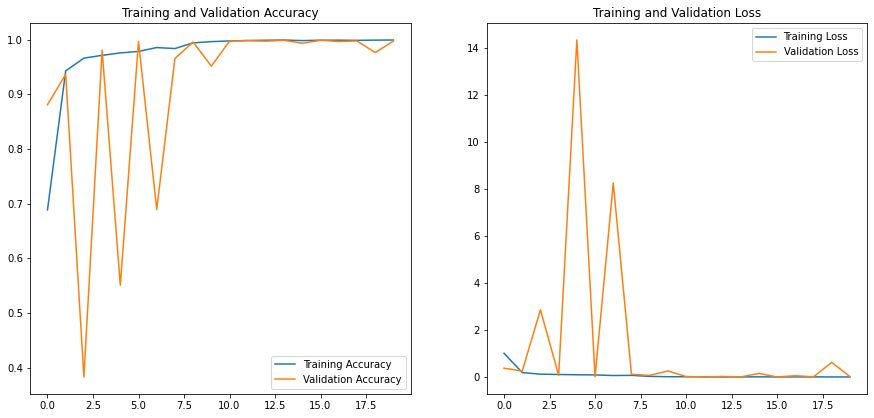

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [63]:
predictions =  np.argmax(model.predict(x_test),axis = 1) 
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
for i in predictions[:5]:
    print(chr(i+65))

225/225 [==============================] - 7s 29ms/step
G
F
K
A
D


In [64]:
print("Classification Report:-")

classes = ["Class " + chr(i+65) for i in range(25) if i != 9 ]
print(classification_report(test_label, predictions, target_names = classes))

Classification Report:-
              precision    recall  f1-score   support

     Class A       1.00      1.00      1.00       331
     Class B       1.00      1.00      1.00       432
     Class C       1.00      1.00      1.00       310
     Class D       1.00      1.00      1.00       245
     Class E       0.96      1.00      0.98       498
     Class F       1.00      1.00      1.00       247
     Class G       1.00      0.95      0.97       348
     Class H       1.00      1.00      1.00       436
     Class I       1.00      1.00      1.00       288
     Class K       1.00      1.00      1.00       331
     Class L       1.00      1.00      1.00       209
     Class M       1.00      1.00      1.00       394
     Class N       1.00      1.00      1.00       291
     Class O       1.00      1.00      1.00       246
     Class P       1.00      1.00      1.00       347
     Class Q       1.00      1.00      1.00       164
     Class R       1.00      1.00      1.00       144
   

Confusion Matrix:-


<AxesSubplot:>

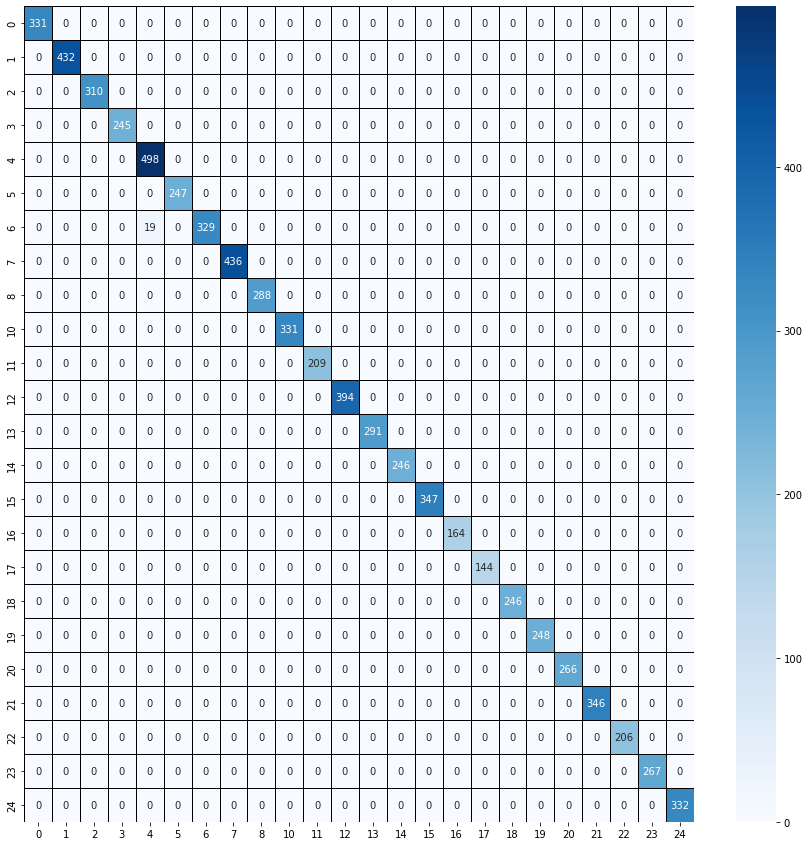

In [65]:
print("Confusion Matrix:-")

cm = confusion_matrix(test_label,predictions)
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

Predictions Sample


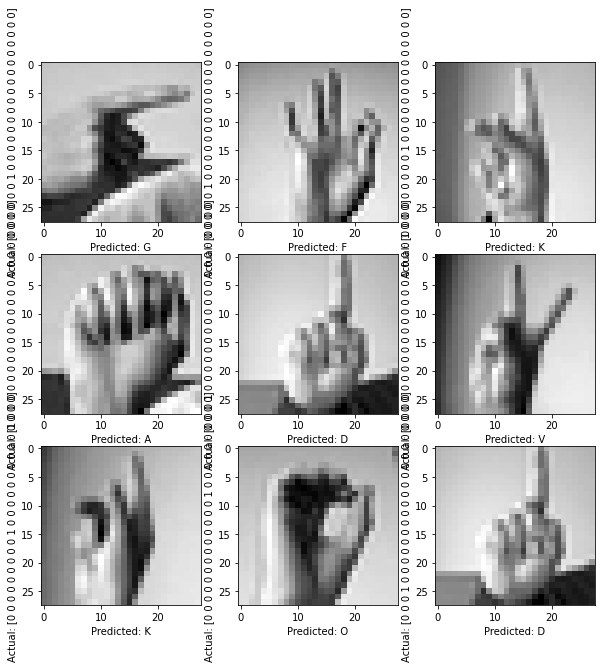

In [71]:
print("Predictions Sample")

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28) ,cmap='gray')
    plt.ylabel(f"Actual: {y_test[i]}")
    plt.xlabel(f"Predicted: {chr(predictions[i]+65)}")
    
plt.show()